# Problem Statement:

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Import Libraries

In [1]:
import pandas
import warnings
import matplotlib
import numpy 
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset1

## EDA(Exploratory Data Analysis)

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
df_train.shape

(550068, 12)

# Load Dataset2

In [6]:
df_test = pd.read_csv("test.csv")

In [7]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
df_test.shape

(233599, 11)

## Merging Train and Test Dataset Together as a One Dataset

In [9]:
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [11]:
df.shape

(783667, 12)

In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [16]:
# Here we will drop 'User_ID' because it has no use
df.drop(['User_ID'], axis=1, inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [18]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Coverting Categorical Features like Gender, Age and City_Category to Numerical values and droping 'City_Category'

In [19]:
df["Gender"] = df["Gender"].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
# To find unique categories in Age feature
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [21]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
df.tail()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN
233598,P00316642,0,5,0,B,4+,1,4,5.0,NaN,NaN


In [23]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [24]:
df = pd.concat([df,df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [25]:
# Droping 'City_Category' feature from dataset
df.drop('City_Category',axis =1,inplace=True)
df.drop('Product_ID',axis = 1, inplace=True)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
# Working with Categorical feature
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].str.replace("+","")

In [28]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [30]:
# Changing Object to Integer for 'Stay_In_Current_City_Years' feature
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].astype(int)
# Changing uint8 to int value
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [31]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4,0,8,NaN,NaN,7969.0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


### Dealing with Missing values

In [33]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [34]:
df['Product_Category_2'].unique()    # These below values are 'Discreate Values'

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [35]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [36]:
df['Product_Category_3'].unique()  # Way to find out unique value for column 'Product_Category'

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [37]:
df['Product_Category_3'].value_counts() # Way to find out total numbers of counts of unique values for column 'Product_Category'

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

#### Mode Imputation for Discreate Values/Features

In [38]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2']).mode()[0]

In [39]:
df['Product_Category_2'].isnull().sum()

0

In [40]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3']).mode()[0]

In [41]:
df['Product_Category_3'].isnull().sum()

0

In [42]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,16.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
df.tail()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
233594,0,3,15,4,1,8,8.0,16.0,NaN,1,0
233595,0,3,15,4,1,5,8.0,16.0,NaN,1,0
233596,0,3,15,4,1,1,8.0,16.0,NaN,1,0
233597,0,5,1,4,0,10,8.0,16.0,NaN,0,1
233598,0,5,0,4,1,4,8.0,16.0,NaN,1,0


## Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

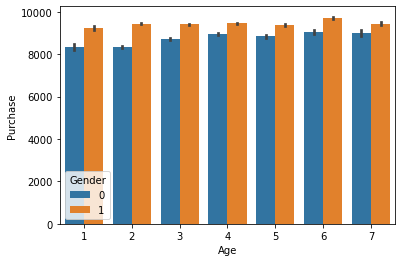

In [44]:
sns.barplot(x = 'Age',y = 'Purchase', hue = 'Gender', data = df)

### Obervation:
  ##### Male parchase more than Female

<AxesSubplot:xlabel='Gender', ylabel='count'>

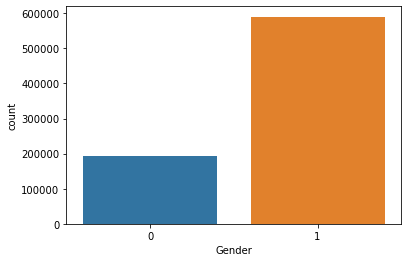

In [45]:
sns.countplot(x='Gender', data = df)

### Obervation:
   ##### Count of Male is more than Female

<AxesSubplot:xlabel='Age', ylabel='count'>

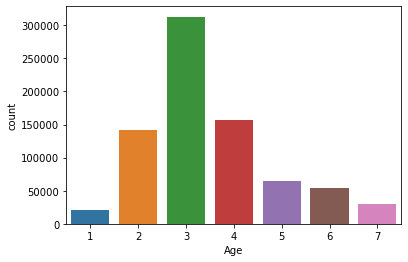

In [46]:
sns.countplot(x='Age', data = df)

### Obervation:
   ##### Count of Age between 26 to 35 is highest that is 'Green' bargraph

<AxesSubplot:xlabel='Occupation', ylabel='count'>

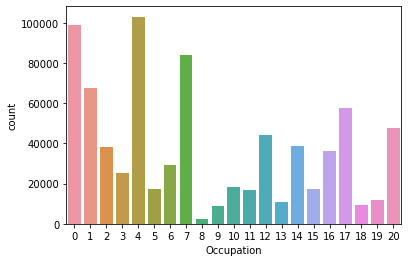

In [47]:
sns.countplot(x='Occupation', data = df)

### Obervation:
   #####  Occupation in class 4 has highest count

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

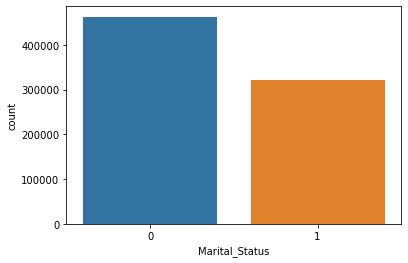

In [48]:
sns.countplot(x='Marital_Status', data = df)

### Obervation:
   ##### Female married count is more than Male

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

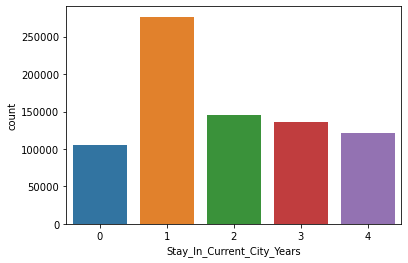

In [49]:
sns.countplot(x='Stay_In_Current_City_Years', data = df)

### Obervation:
   ##### Class 1 in Stay_In_Current_City_Years has maximum count overall

<AxesSubplot:xlabel='B', ylabel='count'>

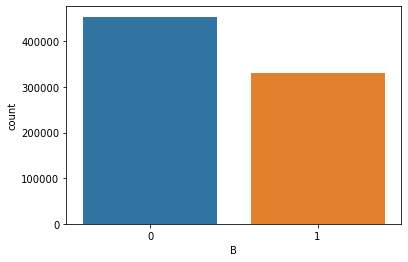

In [50]:
sns.countplot(x='B', data = df)

### Obervation:
   ##### B city category has highest count of Female

<AxesSubplot:xlabel='C', ylabel='count'>

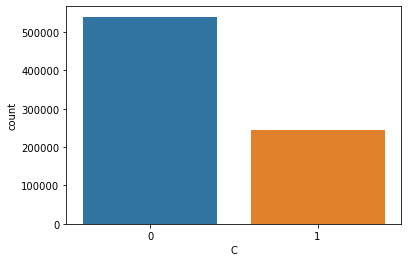

In [51]:
sns.countplot(x='C', data = df)

### Obervation:
  ##### C city category has highest count of Female

<AxesSubplot:xlabel='C', ylabel='Purchase'>

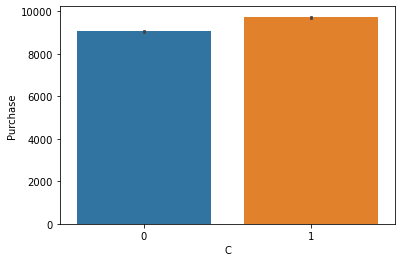

In [52]:
sns.barplot(x = 'C',y = 'Purchase', data = df)

### Obervation:
  ##### Purchase by Male is higher than Female in city category C

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

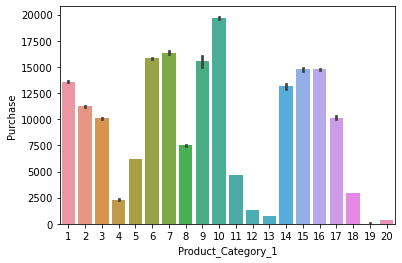

In [53]:
sns.barplot(x = 'Product_Category_1',y = 'Purchase', data = df)

### Obervation: 
  ##### Purchase in class 10 of  Product_Category_1 has highest

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

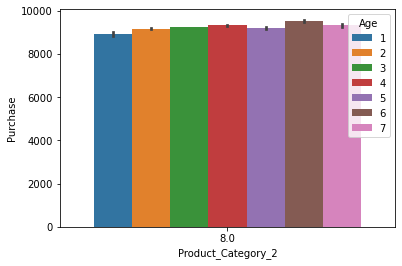

In [54]:
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue='Age', data = df)

### Obervation:
  ##### Age between 45 - 50 has maximum Purchase of Product_Category_2

In [55]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,8.0,16.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,8.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [56]:
df['Purchase'].isnull().sum()

233599

In [57]:
df_test = df[df['Purchase'].isnull()]

In [58]:
df_train = df[~df['Purchase'].isnull()]

# Train Test Split Data

In [59]:
X = df_train.drop('Purchase',axis=1)

In [60]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,8.0,16.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,8.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [61]:
X.shape

(550068, 10)

In [62]:
y = df_train['Purchase']

In [63]:
y.shape

(550068,)

In [64]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

# Training Model

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
# The coefficients
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [ 2.15690166e+02  1.53738630e+02  4.04448438e+01  1.19321105e+01
 -3.05033433e+01 -1.73044489e+03  5.11590770e-12  0.00000000e+00
  7.94855782e+01  3.22051186e+02]


# Prediction on Test Data

In [73]:
predictions = lr.predict( X_test)

Text(0, 0.5, 'Predicted Y')

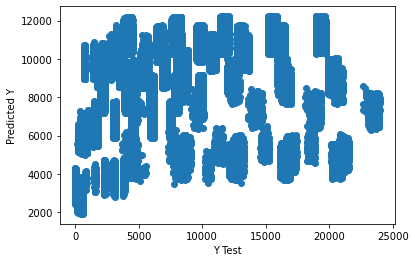

In [74]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating Model

In [75]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3596.594422942598
MSE: 22109514.209047776
RMSE: 4702.075521410495


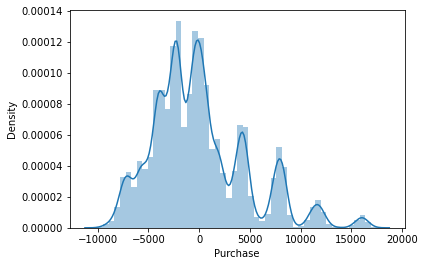

In [76]:
sns.distplot((y_test-predictions),bins=50);